In [2]:
%matplotlib inline

In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

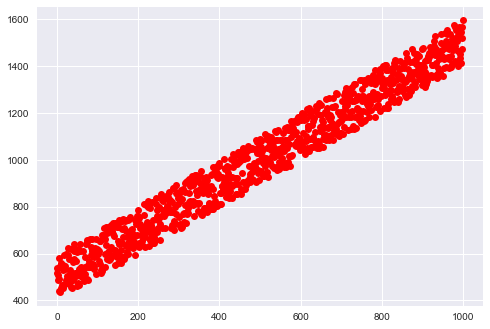

In [259]:
noiseSize = 100
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
# sample[1] = np.sqrt(size - sample)[0]
sample[1] = sample[0] + 500
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T

plt.plot(sample[:,0], sample[:,1], 'ro')

In [261]:
data = sample
n = 2
m = data.shape[0]

x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

y = np.array( data[:,-1] )
y = y.T

print(x)
print(y)

[[   1.    0.]
 [   1.    1.]
 [   1.    2.]
 ..., 
 [   1.  997.]
 [   1.  998.]
 [   1.  999.]]
[ 518  540  508  487  490  579  442  548  435  454  560  542  544  465  531
  455  553  467  594  532  547  599  487  474  502  489  595  473  624  575
  481  530  518  477  618  458  499  504  455  488  563  611  640  578  515
  618  505  570  518  460  607  619  473  533  612  467  642  611  515  541
  503  498  509  612  508  530  483  504  513  587  543  639  543  493  658
  650  489  549  569  542  543  662  541  594  628  661  616  610  554  607
  548  532  585  620  622  512  661  591  617  618  596  608  613  566  610
  653  652  554  531  518  677  661  525  677  665  710  666  597  542  660
  635  711  689  576  710  713  606  612  572  701  575  712  587  628  723
  698  709  594  684  732  722  675  728  614  553  589  602  712  585  652
  561  711  642  744  734  575  591  616  561  643  737  704  669  747  577
  710  706  737  590  744  694  632  669  607  745  646  599  746 

In [262]:
# # TODO: make it faster!
# scaleInfo = []

# for i in range(0,n):
#     scaleInfo.append( [x[:,i].min(), x[:,i].max(), x[:,i].mean()] )

# print( scaleInfo )

# for i in range(0, m):
#     for j in range(0, n):
#         x[i][j] = (x[i][j] - scaleInfo[j][2]) / (scaleInfo[j][1])

In [263]:
# theta[0] = theta[0] * scaleInfo[0][1] + scaleInfo[0][2]
# theta[1] = theta[1] * scaleInfo[1][1] + scaleInfo[1][2]
# theta

theta: [ 0.00379626  1.68934089]


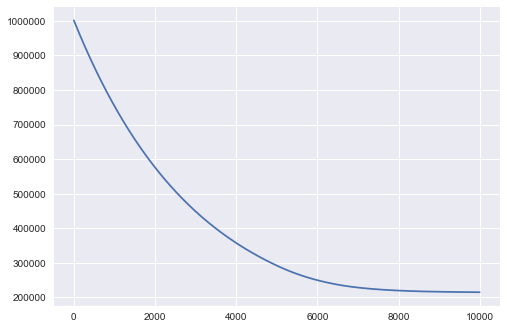

In [264]:
autoAlphaSelect = False
iterCount = 10000
alpha = .000000001
theta = np.array(n * [0])

j = []
complete = False

while( not complete ):
    complete = True
    for _ in range(0, iterCount):
        h = np.dot(x , theta.T).T
        loss = h - y
        gradient = np.dot(loss , x)
        theta = theta - alpha * gradient / m
        j += [ abs(np.array(loss)).sum() ]
        
        # fix big alpha
        if ( autoAlphaSelect and j[ len(j)-1 ] > j[ len(j)-2 ]):
            complete = False
            alpha = alpha / 10
            print('alpha:', alpha)
            theta = np.array(n * [0])
            j.clear()
            break

print('theta:', theta )
plt.plot(j)

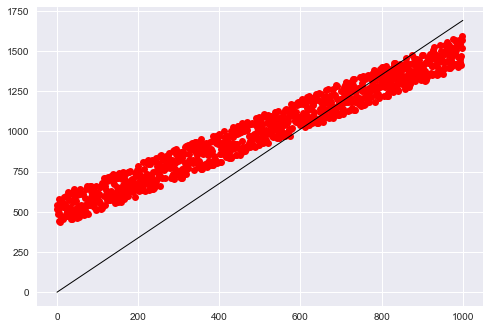

In [265]:
plt.plot(sample[:,0], sample[:,1], 'ro')
plt.plot([0, m], [theta[0],  theta[0] + m*theta[1]], 'k-', lw=1)

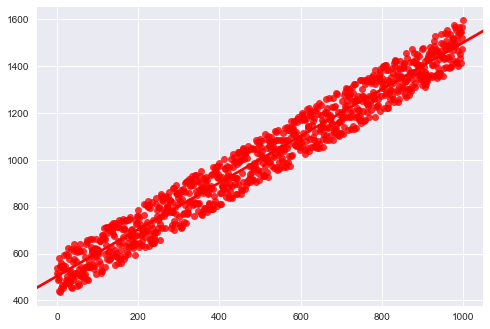

In [266]:
sns.regplot(sample[:,0], sample[:,1], color='red')